In [6]:
%matplotlib inline

import nengo
import tensorflow as tf
import nengo_dl
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
# Defining the Network
with nengo.Network(seed=0) as net:
    # Setting the Neuron Type to Rectified Linear to allow differntiable (and therefore trainable) outputs
    net.config[nengo.Ensemble].neuron_type = nengo.RectifiedLinear()
    net.config[nengo.Ensemble].gain = nengo.dists.Choice([1])
    net.config[nengo.Ensemble].bias = nengo.dists.Uniform(-1, 1)
    net.config[nengo.Connection].synapse = None
    
    a = nengo.Node(output=lambda t: random.random())
    b = nengo.Ensemble(30, 1)
    
    nengo.Connection(a, b)
    
    # Putting a probe on the input to monitor the values
    inputProbe = nengo.Probe(a)
    
    # defining the output to be the value of the last ensemble (ensemble b)
    outputProbe = nengo.Probe(b)

In [8]:
# Defining training parameters
n_steps = 8 # How many steps the model should be run for
minibatch_size = 100

Building completed in 0:00:00 
Optimization completed in 0:00:00 
Construction completed in 0:00:00 
Simulation completed in 0:00:00


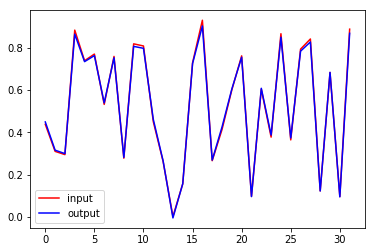

In [11]:
# Showing the pretraining output/input
with nengo_dl.Simulator(net) as sim:
    sim.run_steps(32)
    plt.plot(sim.data[inputProbe], 'r', label='input')
    plt.plot(sim.data[outputProbe], 'b', label='output')
    plt.legend()

Building completed in 0:00:00 
Optimization completed in 0:00:00 
Construction completed in 0:00:00 
[##############################] ETA: 0:00:00 (Training)
Training completed in 0:00:04
Simulation completed in 0:00:00


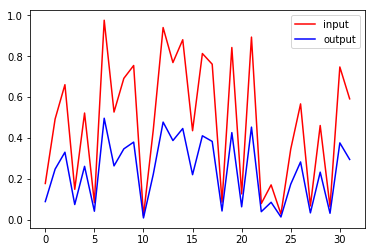

In [16]:
with nengo_dl.Simulator(net, step_blocks=n_steps, minibatch_size=minibatch_size) as sim:
    # generate an input feed
    input_feed = np.random.uniform(-1, 1, size=(1000, n_steps, 1))
    output_feed = 0.5 * input_feed

    sim.train({a:input_feed}, {outputProbe: output_feed},
             tf.train.MomentumOptimizer(5e-2, 0.9), n_epochs=30)
    
    # clear the previous probe data
    sim.soft_reset()    
    # Showing the trained network's output
    sim.run_steps(32)
    plt.plot(sim.data[inputProbe][0].flatten(), 'r', label='input')
    plt.plot(sim.data[outputProbe][0].flatten(), 'b', label='output')
    plt.legend()